# Combining Datasets with Pandas

#### Creation of a new environment which contains geopandas

Why's that?  
In this notebook we want to use the GeoPandas package, which is based on an _open source project to add support for geographic data to pandas objects._ - in brief: we will have a dataframe with an additional geometric datatype.  

Since we usually don't need packages for geospatial data, we don't want to load it everytime we activate our usual nf_base environment.  

Let's create a new environment called 'nf_geo', that has 'geopandas' installed.

In [1]:
# clone the nf_base - this may take a few seconds up to two minutes ...
!conda create --yes --name nf_geo python=3.9 \
    matplotlib pandas=1.5.2 geopandas scipy seaborn statsmodels scikit-learn ipykernel numpy pip

Solving environment: unsuccessful attempt using repodata from current_repodata.json, retrying with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.10.0



## Package Plan ##

  environment location: /opt/homebrew/Caskroom/miniconda/base/envs/nf_geo

  added / updated specs:
    - geopandas
    - ipykernel
    - matplotlib
    - numpy
    - pandas=1.5.2
    - pip
    - python=3.9
    - scikit-learn
    - scipy
    - seaborn
    - statsmodels


The following NEW packages will be INSTALLED:

  appnope            pkgs/main/osx-arm64::appnope-0.1.2-py39hca03da5_1001 
  asttokens          pkgs/main/noarch::asttokens-2.0.5-pyhd3eb1b0_0 
  attrs              pkgs/main/osx-arm64::attrs-23.1.0-py39hca03da5_0 
  backcal

*(If this last step takes longer than up to a minute and there's a message telling you conda is "solving environment", please reach out to us.)*

in order to use our new environment, you have to switch the kernel and select the python kernel of your new nf_geo environment. if it doesn't appear immediately in the list of available kernels, klick on 'select another kernel'...

---

Now that we have our new nf_geo environment, activate it for this jupyter notebook (choose the kernel) and we're ready to import our needed modules:

In [5]:
# standard import of pandas
import pandas as pd

# additional import of the geopandas package
import geopandas as gpd

# numpy, "numerical python" - we'll cover this in the following notebooks.
import numpy as np

# hides warning messages
import warnings
warnings.filterwarnings("ignore")

## Loading the first dataset
The data we'll use is data on bicycle theft crimes at the granular level of Berlin city planning areas, so-called "LOR" - "Lebensweltlich orientierte Räume", we will stumble over it again later!  
This data is provided by Berlin Open Data and collected by the police of Berlin.  

### The goal of our analysis is: 
### Identify areas in Berlin with the most bike thefts and the bike type that has the highest share in thefts.

But first things first: We make the data accessible just by loading the .csv-file into a dataframe and get an overview.

[Website to datatset -  daten.berlin.de](https://daten.berlin.de/datensaetze/fahrraddiebstahl-berlin)

- Licence:
    - Creative Commons Namensnennung CC-BY License
- Geographical Granularity: 
    - Berlin
- Publisher: 
    - Polizei Berlin LKA St 14
- E Mail: 
    - onlineredaktion@polizei.berlin.de

Next comes a code cell where we define all functions, that we will use in this notebook. 

In [6]:
# Function Definitions

def clean_bike_data(df):

    return df

In [9]:
thefts_df_raw = pd.read_csv('../../Data/Fahrraddiebstahl.csv', encoding='latin-1') # proper encoding is necessary here!
# make column names lowercase

thefts_df_raw.head(2)

,angelegt_am,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,erfassungsgrund
0,14.09.2020,10.09.2020,10,10.09.2020,12,3400723,706,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
1,29.09.2020,09.09.2020,16,10.09.2020,7,9200716,220,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


In [10]:
# what's the shape, the observations, datatypes and null-counts?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39407 entries, 0 to 39406
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   angelegt_am            39407 non-null  object
 1   tatzeit_anfang_datum   39407 non-null  object
 2   tatzeit_anfang_stunde  39407 non-null  int64 
 3   tatzeit_ende_datum     39407 non-null  object
 4   tatzeit_ende_stunde    39407 non-null  int64 
 5   lor                    39407 non-null  int64 
 6   schadenshoehe          39407 non-null  int64 
 7   versuch                39407 non-null  object
 8   art_des_fahrrads       39407 non-null  object
 9   delikt                 39407 non-null  object
 10  erfassungsgrund        39407 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.3+ MB


## Clean Data

In [11]:
# clean the bike data by applying the clean_bike_data function, 
# that you developed in the data_preparation exercise.

# enter code below, assign output to a new variable called thefts_df.
thefts_df = clean_bike_data(thefts_df_raw)

## Prepare Data

Now that we're done cleaning our dataset, we'll take a look at the unique values of `art_des_fahrrads`...


In [10]:
# A glance at the values of the type of bikes in the dataframe
thefts_df.art_des_fahrrads.unique()

array(['Damenfahrrad', 'Herrenfahrrad', 'Fahrrad', 'Kinderfahrrad',
       'Rennrad', 'Mountainbike', 'diverse Fahrräder', 'Lastenfahrrad'],
      dtype=object)

Great! this is the column we need to specifiy the type of bike that has highest share in our bike thefts! to make our analysis on the bike type even easier we show you a popular data transformation in the next code block...

The idea is to impute it by using categorical data to so called "dummy variables".  
Such a variable (aka indicator variable) is a numeric variable representing categorical data by giving each category an own column and assign a 0 or 1 to it.  

We'll use this on the "Art des Fahrrads" column, the type of bike.

In [12]:
# get_dummies is a method called on the pandas module - you simply pass in a Pandas Series 
# or DataFrame, and it will convert a categorical variable into dummy/indicator variables. 
# The idea of dummy coding is to convert each category into a new column, and assign a 1 or 0 to the column.
# This can be an important step during data preparation for machine learning.

# creating a dataset of type of bike dummy variables.
biketype_dummies = pd.get_dummies(thefts_df.art_des_fahrrads, prefix='type')
biketype_dummies.head()

,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0


This looks good but now `biketype_dummies` is a different dataframe than `thefts_df`, we have our first use case where we need to merge to dataframes.

In [19]:
print("--------- DF 1 : thefts_df -----------------")
display(thefts_df.head(3))
print("--------- DF 2 : biketype_dummies ----------")
display(biketype_dummies.head(3))

--------- DF 1 : thefts_df -----------------


,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt
0,2020-10-09,10,2020-10-09,12,3400723,706,Nein,Damenfahrrad,Fahrraddiebstahl
1,2020-09-09,16,2020-10-09,7,9200716,220,Nein,Damenfahrrad,Fahrraddiebstahl
2,2020-10-09,15,2020-10-09,18,6100207,550,Nein,Herrenfahrrad,Fahrraddiebstahl


--------- DF 2 : biketype_dummies ----------


,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0


Discuss with your group partner....on what key could you combine the two datasets? ...

## Combining dataframes

In this case we can only join on the index, there is no other unique identifier in the data. As we want to combine via index, which method is preferred `join()` or `merge()`? 

### Join()

Now let's look at the join() method. It joins on indices by default and is called on a dataframe instance. This means that we can simply join our bike type dummies dataframe back to our original bike thefts dataframe with the following code:

In [20]:
# Joining columns of another DataFrame using the join() method.
join_df = thefts_df.join(biketype_dummies)
join_df.head()

,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder
0,2020-10-09,10,2020-10-09,12,3400723,706,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0
1,2020-09-09,16,2020-10-09,7,9200716,220,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0
2,2020-10-09,15,2020-10-09,18,6100207,550,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0
3,2020-10-09,20,2020-10-09,21,1300733,548,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0
4,2020-09-09,22,2020-10-09,11,8100207,700,Nein,Fahrrad,Fahrraddiebstahl,0,1,0,0,0,0,0,0


In [21]:

# Let's have a look at the columns of our newly assigned dataframe
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39137 entries, 0 to 39406
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   tatzeit_anfang_datum    39137 non-null  datetime64[ns]
 1   tatzeit_anfang_stunde   39137 non-null  int64         
 2   tatzeit_ende_datum      39137 non-null  datetime64[ns]
 3   tatzeit_ende_stunde     39137 non-null  int64         
 4   lor                     39137 non-null  int64         
 5   schadenshoehe           39137 non-null  int64         
 6   versuch                 39137 non-null  object        
 7   art_des_fahrrads        39137 non-null  object        
 8   delikt                  39137 non-null  object        
 9   type_Damenfahrrad       39137 non-null  uint8         
 10  type_Fahrrad            39137 non-null  uint8         
 11  type_Herrenfahrrad      39137 non-null  uint8         
 12  type_Kinderfahrrad      39137 non-null  uint8 

In [28]:
# let's store our final output in a new variable and create a new copy of the dataset
thefts_df_enriched = join_df.copy()

The arguments of `.join` are the following:
```
DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)
```
The documentation refers to the second dataframe as 'other', which the documentations of the other combining methods often refer to as 'right'.
With how we can specify which join method we want to use.

If we want to join using a common column, we need to set this column to be the index in both dataframes. The joined DataFrame will have the common column as its index.
```
df.set_index('column_name').join(other.set_index('column_name'))
```
Another option to join using a common column is to use the on parameter. This method preserves the original DataFrame’s index in the result.
```
df.join(other.set_index('column_name'), on='column_name')
```
See the documentation for more information.

The how argument to merge specifies which keys are included in the resulting table. If a key combination does not appear in either the left or right tables, the values in the joined table will be NA. Here is a summary of the how options and their SQL equivalent names:

Merge/Join in Pandas | SQL Join Name | Description
---|---|---
left| LEFT OUTER JOIN | Use keys from left frame only
right | RIGHT OUTER JOIN | Use keys from right frame only
outer | FULL OUTER JOIN | Use union of keys from both frames
inner | INNER JOIN | Use intersection of keys from both frames


You can also think of it as set theory and use Venn diagrams to illustrate what happens in each method.

![Join Methods](../../images/join_types.png)

### Merge()
Let's look at the `merge()` method. Merge combines dataframes on column columns by default and can be used via the pandas module AND called on a dataframe instance.

The arguments of `.merge` are the following: 
````
DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False,   
suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
````
See the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

In [22]:
# Since in both dataframes, we need a common column.
# Let's use the index column as the one to merge on:
thefts_df_ind = thefts_df.reset_index()
biketype_dummies_ind = biketype_dummies.reset_index()

In [23]:
# check result - you will see a new column called index in the dataframe
thefts_df_ind.head()

,index,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt
0,0,2020-10-09,10,2020-10-09,12,3400723,706,Nein,Damenfahrrad,Fahrraddiebstahl
1,1,2020-09-09,16,2020-10-09,7,9200716,220,Nein,Damenfahrrad,Fahrraddiebstahl
2,2,2020-10-09,15,2020-10-09,18,6100207,550,Nein,Herrenfahrrad,Fahrraddiebstahl
3,3,2020-10-09,20,2020-10-09,21,1300733,548,Nein,Herrenfahrrad,Fahrraddiebstahl
4,4,2020-09-09,22,2020-10-09,11,8100207,700,Nein,Fahrrad,Fahrraddiebstahl


In [24]:
# check result - you will see a new column called index in the dataframe
biketype_dummies_ind.head()

,index,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder
0,0,1,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0
2,2,0,0,1,0,0,0,0,0
3,3,0,0,1,0,0,0,0,0
4,4,0,1,0,0,0,0,0,0


In [25]:
# Merge the quality_dummies df on the thefts_df instance on the common column 'index'
merge_df1 = thefts_df_ind.merge(biketype_dummies_ind, on='index')
merge_df1.head()

,index,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder
0,0,2020-10-09,10,2020-10-09,12,3400723,706,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0
1,1,2020-09-09,16,2020-10-09,7,9200716,220,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0
2,2,2020-10-09,15,2020-10-09,18,6100207,550,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0
3,3,2020-10-09,20,2020-10-09,21,1300733,548,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0
4,4,2020-09-09,22,2020-10-09,11,8100207,700,Nein,Fahrrad,Fahrraddiebstahl,0,1,0,0,0,0,0,0


In [26]:
# Or another way: Merge the two dataframes via the pandas module on the common column 'index'
merge_df2 = pd.merge(thefts_df_ind, biketype_dummies_ind, on='index')
merge_df2.head()

,index,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder
0,0,2020-10-09,10,2020-10-09,12,3400723,706,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0
1,1,2020-09-09,16,2020-10-09,7,9200716,220,Nein,Damenfahrrad,Fahrraddiebstahl,1,0,0,0,0,0,0,0
2,2,2020-10-09,15,2020-10-09,18,6100207,550,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0
3,3,2020-10-09,20,2020-10-09,21,1300733,548,Nein,Herrenfahrrad,Fahrraddiebstahl,0,0,1,0,0,0,0,0
4,4,2020-09-09,22,2020-10-09,11,8100207,700,Nein,Fahrrad,Fahrraddiebstahl,0,1,0,0,0,0,0,0


The second approach with the `merge()`-method was for showing you the syntax, we will not use the result anywhere. For the rest of the notebook we will work with the combined dataframe from the `join()`-method, remember we called it `thefts_df_enriched`.

## Combining multiple data sources

Remember we initially said, we wanted to be able to identify areas in Berlin with the most bike thefts?  
So far, we can't.  

We have a lot of features describing the actual bike thefts, but we have nothing to really spot the area where it happens. The only thing we have in our dataframe is this suspicious "LOR" - so we have to do some research on it, if and how we can use it ...  

The [dataset description](https://www.berlin.de/polizei/_assets/dienststellen/lka/datensatzbeschreibung.pdf) at Berlin Open Data tells us about the LOR column:
- Kennung des Planungsraums, 8-stellig
- Raumhierarchie lebensweltlich orientierte Räume (LOR) der Senatsverwaltung für Stadtentwicklung und
Wohnen

Wow. _Raumhierarchie lebensweltlich orientierte Räume_ - that's where you know you deal with authorities. 
Since we don't have any Ideas what that means, we google it and find, that at the Website of [stadtentwicklung.berlin.de](https://www.stadtentwicklung.berlin.de/planen/basisdaten_stadtentwicklung/lor/de/download.shtml) there are LOR associated vector data files, .shp "shapefiles". So we have a look at them, too ...


We now access the shapefiles and try to combine them with our biketheft data.

In [29]:
# assign a geodataframe based on the shapefile
gdf = gpd.GeoDataFrame.from_file('../../Data/LOR_SHP_2021/lor_plr.shp')
gdf.columns = gdf.columns.str.lower()
gdf.head(5)

# attention! if you had troubles installing geopandas, you won't be able to plot the ploygons!
# however, you can still proceed with the rest of the analysis if you read in this csv instead:
# gdf = pd.read_csv('../../data/shapefile.csv')

,plr_id,plr_name,geometry
0,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5..."
1,08401244,Waßmannsdorfer Chaussee,"POLYGON ((397994.196 5806511.717, 397993.161 5..."
2,08401246,Waltersdorfer Chaussee Ost,"POLYGON ((398909.474 5806709.670, 398907.398 5..."
3,08401243,Alt-Rudow,"POLYGON ((399260.777 5809071.777, 399251.106 5..."
4,08401242,Zittauer Straße,"POLYGON ((397378.822 5808471.734, 397377.582 5..."


In [30]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   plr_id    542 non-null    object  
 1   plr_name  542 non-null    object  
 2   geometry  542 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 12.8+ KB


So we see, this gave us a dataframe with obviously the LOR as plr_id, the district name and the geometrical shape of the area as a polygon.

##### Polygon? What was that again?

<img src="../../images/geometries.jpg" alt="geometries" width="500"/>

So, those polygons should give us areas of Berlin. Let's give it a try: 

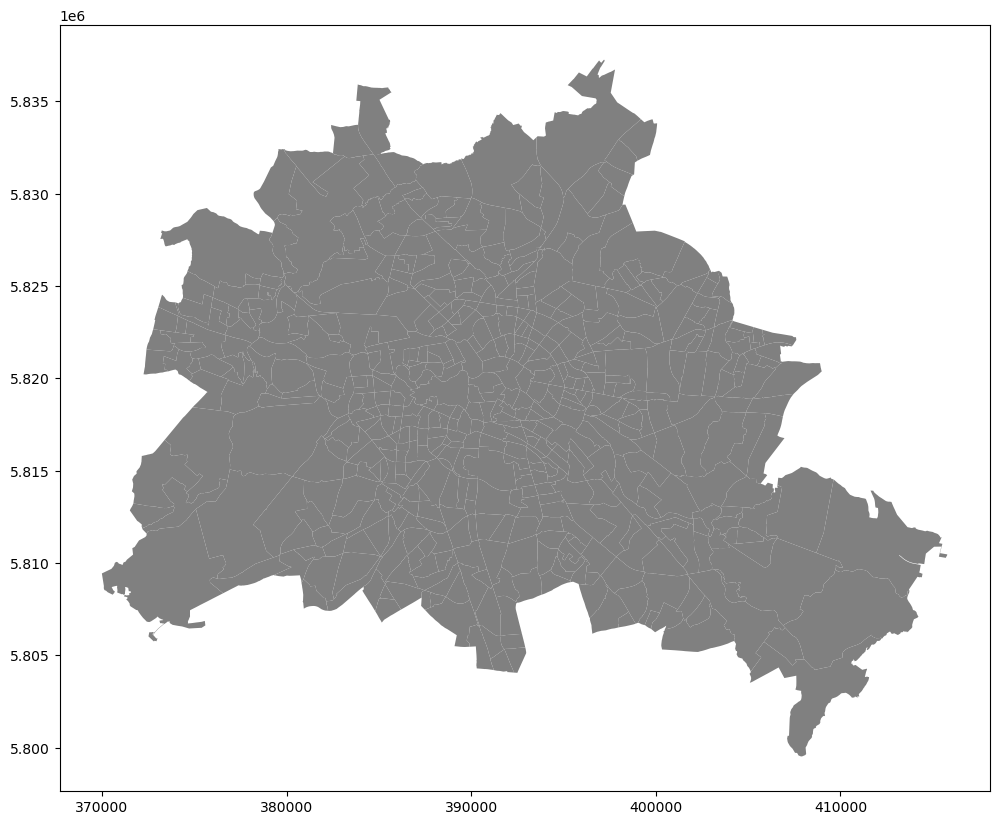

In [31]:
# plotting the geometries
berlin = gdf.plot(color='grey', figsize=(12, 12));
# optional: comment out the next line to highlight a particular suburb in red...
# gdf[gdf['plr_name'] == 'Alt-Treptow'].plot(ax=berlin, color='red')


Kepler for beautiful visuals: https://kepler.gl/,
can be used in jupyter notebooks as well.

That somehow looks like Berlin which makes us quite confident to proceed to try to merge the sets, since our bike theft data is not yet inside our geodataframe (or vice versa) - those are still two seperate data sets.  

So - we need to have a look at the column that allow us to merge ...

In [32]:
# bike thefts lor column
thefts_df.lor.info()

<class 'pandas.core.series.Series'>
Int64Index: 39137 entries, 0 to 39406
Series name: lor
Non-Null Count  Dtype
--------------  -----
39137 non-null  int64
dtypes: int64(1)
memory usage: 1.6 MB


In [33]:
# geodataframe lor column
gdf.plr_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 542 entries, 0 to 541
Series name: plr_id
Non-Null Count  Dtype 
--------------  ----- 
542 non-null    object
dtypes: object(1)
memory usage: 4.4+ KB


Not that easy, again.  
- The column 'lor' in the bike theft data is an integer.  
- Integers as numeric values can't have leading zeros.  
- That's why it sometimes is 8 digits, sometimes is just 7 digits long - it then misses a leading 0 - we need to impute!  

In the geodataframe, the lor column is an object, which means a string in this case.  
Feel free to have a closer look ...

In [34]:
# change the lor column datatype to string and call new column 'lor_str'

# fill leading gaps up to 8 characters with zeros and call the new column accordingly to the geodataframe
# example 3400723 to 03400723

#before dropping not needed columns, let's check
thefts_df_enriched[['plr_id','lor_str']].head()

#...looks good in our sample check :-)


,plr_id,lor_str
0,03400723,3400723
1,09200716,9200716
2,06100207,6100207
3,01300733,1300733
4,08100207,8100207


In [35]:
# dropping no longer needed columns
thefts_df_enriched.drop(columns=['lor', 'lor_str'], inplace=True)

In [36]:
# compare with the geodataframe
display(thefts_df_enriched[['art_des_fahrrads','delikt','plr_id']].head())
display(gdf.head())

,art_des_fahrrads,delikt,plr_id
0,Damenfahrrad,Fahrraddiebstahl,03400723
1,Damenfahrrad,Fahrraddiebstahl,09200716
2,Herrenfahrrad,Fahrraddiebstahl,06100207
3,Herrenfahrrad,Fahrraddiebstahl,01300733
4,Fahrrad,Fahrraddiebstahl,08100207


,plr_id,plr_name,geometry
0,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5..."
1,08401244,Waßmannsdorfer Chaussee,"POLYGON ((397994.196 5806511.717, 397993.161 5..."
2,08401246,Waltersdorfer Chaussee Ost,"POLYGON ((398909.474 5806709.670, 398907.398 5..."
3,08401243,Alt-Rudow,"POLYGON ((399260.777 5809071.777, 399251.106 5..."
4,08401242,Zittauer Straße,"POLYGON ((397378.822 5808471.734, 397377.582 5..."


Now, we are able to merge our dataframes

In [ ]:
# merge dataframes 'gdf' and 'thefts_df_enriched' on the plr_id columns
# call new dataframe 'gdf_biketheft'
# what type of merge do we want to do? in our case we only want to keep the rows 
# that match with a plr in  gdf, so we perform 'inner' merge



<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 39137 entries, 0 to 39136
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   plr_id                  39137 non-null  object        
 1   plr_name                39137 non-null  object        
 2   geometry                39137 non-null  geometry      
 3   tatzeit_anfang_datum    39137 non-null  datetime64[ns]
 4   tatzeit_anfang_stunde   39137 non-null  int64         
 5   tatzeit_ende_datum      39137 non-null  datetime64[ns]
 6   tatzeit_ende_stunde     39137 non-null  int64         
 7   schadenshoehe           39137 non-null  int64         
 8   versuch                 39137 non-null  object        
 9   art_des_fahrrads        39137 non-null  object        
 10  delikt                  39137 non-null  object        
 11  type_Damenfahrrad       39137 non-null  uint8         
 12  type_Fahrrad            39137 non-null

And so, we are finally able to infer infer the are with the most bikes stolen  
by aggregating count of thefts:

### How many bikethefts per postcode?

In [58]:
# counting thefts in areas
# note: we need .reset_index(name='thefts') to convert the output back to a pandas dataframe.
df_plr_group_thefts = gdf_biketheft.groupby('plr_id').size().reset_index(name='thefts')

# showing new dataframe with plr_id and aggregated count of thefts
df_plr_group_thefts.head()

,plr_id,thefts
0,01100101,71
1,01100102,148
2,01100103,117
3,01100104,102
4,01100205,43


### What's the average monetary value of the thefts per postcode?

In [59]:
# count thefts in areas and store the result in a new df called 'df_plr_group_mean', name the column with avg monetary value 'avg_amount'

# showing new dataframe with plr_id and aggregated mean of thefts
df_plr_group_mean.head()

,avg_amount
plr_id,
01100101,1026
01100102,1334
01100103,764
01100104,744
01100205,1196


### How many thefts per bike type per postcode?

In [60]:
# calculate the number of thefts per bike type per post_code and store the result in a new df called 'df_bike_types_count'


In [62]:
# merging the aggregates into the initial geodataframe

# merge 'df_plr_group_thefts' and 'gdf' and save result as 'gdf_biketheft_1'

# merge 'gdf_biketheft_1' and 'df_plr_group_mean' and save result as 'gdf_biketheft_2'

# merge 'gdf_biketheft_2' and 'df_bike_types_count' and save result as 'gdf_biketheft'


,plr_id,plr_name,geometry,thefts,avg_amount,type_Damenfahrrad,type_Fahrrad,type_Herrenfahrrad,type_Kinderfahrrad,type_Lastenfahrrad,type_Mountainbike,type_Rennrad,type_diverse Fahrräder
0,08401245,Frauenviertel,"POLYGON ((398530.482 5807357.873, 398569.146 5...",10,679,3,1,4,0,0,1,0,1
1,08401244,Waßmannsdorfer Chaussee,"POLYGON ((397994.196 5806511.717, 397993.161 5...",62,679,21,5,27,2,0,5,0,2


### Share of thefts per bike type per postcode

In order to answer one of our main questions we need to calculate the shares for each bike type.


In [63]:
# we need the package numpy to round some numbers
import numpy as np

In [ ]:
# give nr of thefts per bike type and total thefts, calculcate the share.
# name the new columns bles in the following form:
# share_Damenfahrrad = nr type_Damenfahrrad / nr thefts


In [65]:
# let's look at one example to double check our calculations
gdf_biketheft[['plr_id','type_Herrenfahrrad','thefts','share_Herrenfahrrad']].head()

,plr_id,type_Herrenfahrrad,thefts,share_Herrenfahrrad
0,08401245,4,10,0.400000
1,08401244,27,62,0.435484
2,08401246,6,15,0.400000
3,08401243,13,37,0.351351
4,08401242,6,15,0.400000


In [47]:
# Think of more ways to check your calculations!

In [67]:
# ok great now we need to calculcate the bike type with the highest share for each row...
# we want to store this information in a new column called 'type_highest_share'
# tip: search of a pandas function that fullfills this task! 



In [69]:
gdf_biketheft[['plr_name','share_Rennrad','share_Fahrrad','share_Damenfahrrad','share_Herrenfahrrad','type_highest_share']].head(20)

,plr_name,share_Rennrad,share_Fahrrad,share_Damenfahrrad,share_Herrenfahrrad,type_highest_share
0,Frauenviertel,0.000,0.100000,0.300000,0.400000,share_Herrenfahrrad
1,Waßmannsdorfer Chaussee,0.000,0.080645,0.338710,0.435484,share_Herrenfahrrad
2,Waltersdorfer Chaussee Ost,0.000,0.066667,0.333333,0.400000,share_Herrenfahrrad
3,Alt-Rudow,0.000,0.000000,0.459459,0.351351,share_Damenfahrrad
4,Zittauer Straße,0.000,0.133333,0.333333,0.400000,share_Herrenfahrrad
5,Gropiusstadt Süd-Ost,0.000,0.084746,0.355932,0.338983,share_Damenfahrrad
6,Gropiusstadt Mitte,0.000,0.095238,0.523810,0.285714,share_Damenfahrrad
7,Blumenviertel,0.000,0.041667,0.166667,0.541667,share_Herrenfahrrad
8,Gropiusstadt Nord-West,0.000,0.117647,0.392157,0.411765,share_Herrenfahrrad
9,Gropiusstadt Süd-West,0.000,0.217391,0.304348,0.391304,share_Herrenfahrrad


ok great! We have calculated for each post code what type of bike was stolen the most.

## Retrieve the bike type with the highest share of thefts


In [73]:
# bike type with highest share of thefts


type_highest_share
share_Damenfahrrad      98
share_Fahrrad            1
share_Herrenfahrrad    438
share_Kinderfahrrad      1
share_Mountainbike       2
dtype: int64

It is __Herrenfahrrad with 438 thefts__ in the observed timeframe!  

---

## Retrieve the postcode with the highest share of thefts


In [76]:
# Retrieve the postcode with the highest share of thefts


,plr_name,thefts,avg_amount
485,Alt-Treptow,501,791


It is __Alt-Treptow with 501 thefts__ in the observed timeframe with an average theft amount of 791 Euro!  

---

Congratulations!  
You made it through another intense notebook - but we hope the little excursions brought some fun ...